# The Duffing Oscillator

The Duffing Oscillator is a non-linear second-order differential equation. This system represents a damped driven oscilator, where $x$ corresponds to displacement over time, $x(t)$.

$\ddot{x} + \delta \dot{x} + \alpha x + \beta x^{3} = \gamma cos(\omega t)$

$\ddot{x} = - \delta \dot{x} - \alpha x - \beta x^{3} + \gamma cos(\omega t)$



In order to solve this, we need to seperate the differential equation (DE) into two first order DE's by defining $x_1$ and $x_2$ for a vairable substitution.

$x_1 = x$

$x_2 = x_1' = \dot{x}$

$x_2' = \ddot{x}$

Next, we can write code to describe each first order DE in terms of the variables defined, for some variable $Y$, where $Y[1] = \dot{x}$ and $Y[0] = x $.



$Y[0]' = - \delta \dot{x} - \alpha x - \beta x^{3} + \gamma cos(\omega t) = \ddot{x} =  x_{2}'$

$Y[1]' = \dot{x} = x_{1}' = x_{2}$







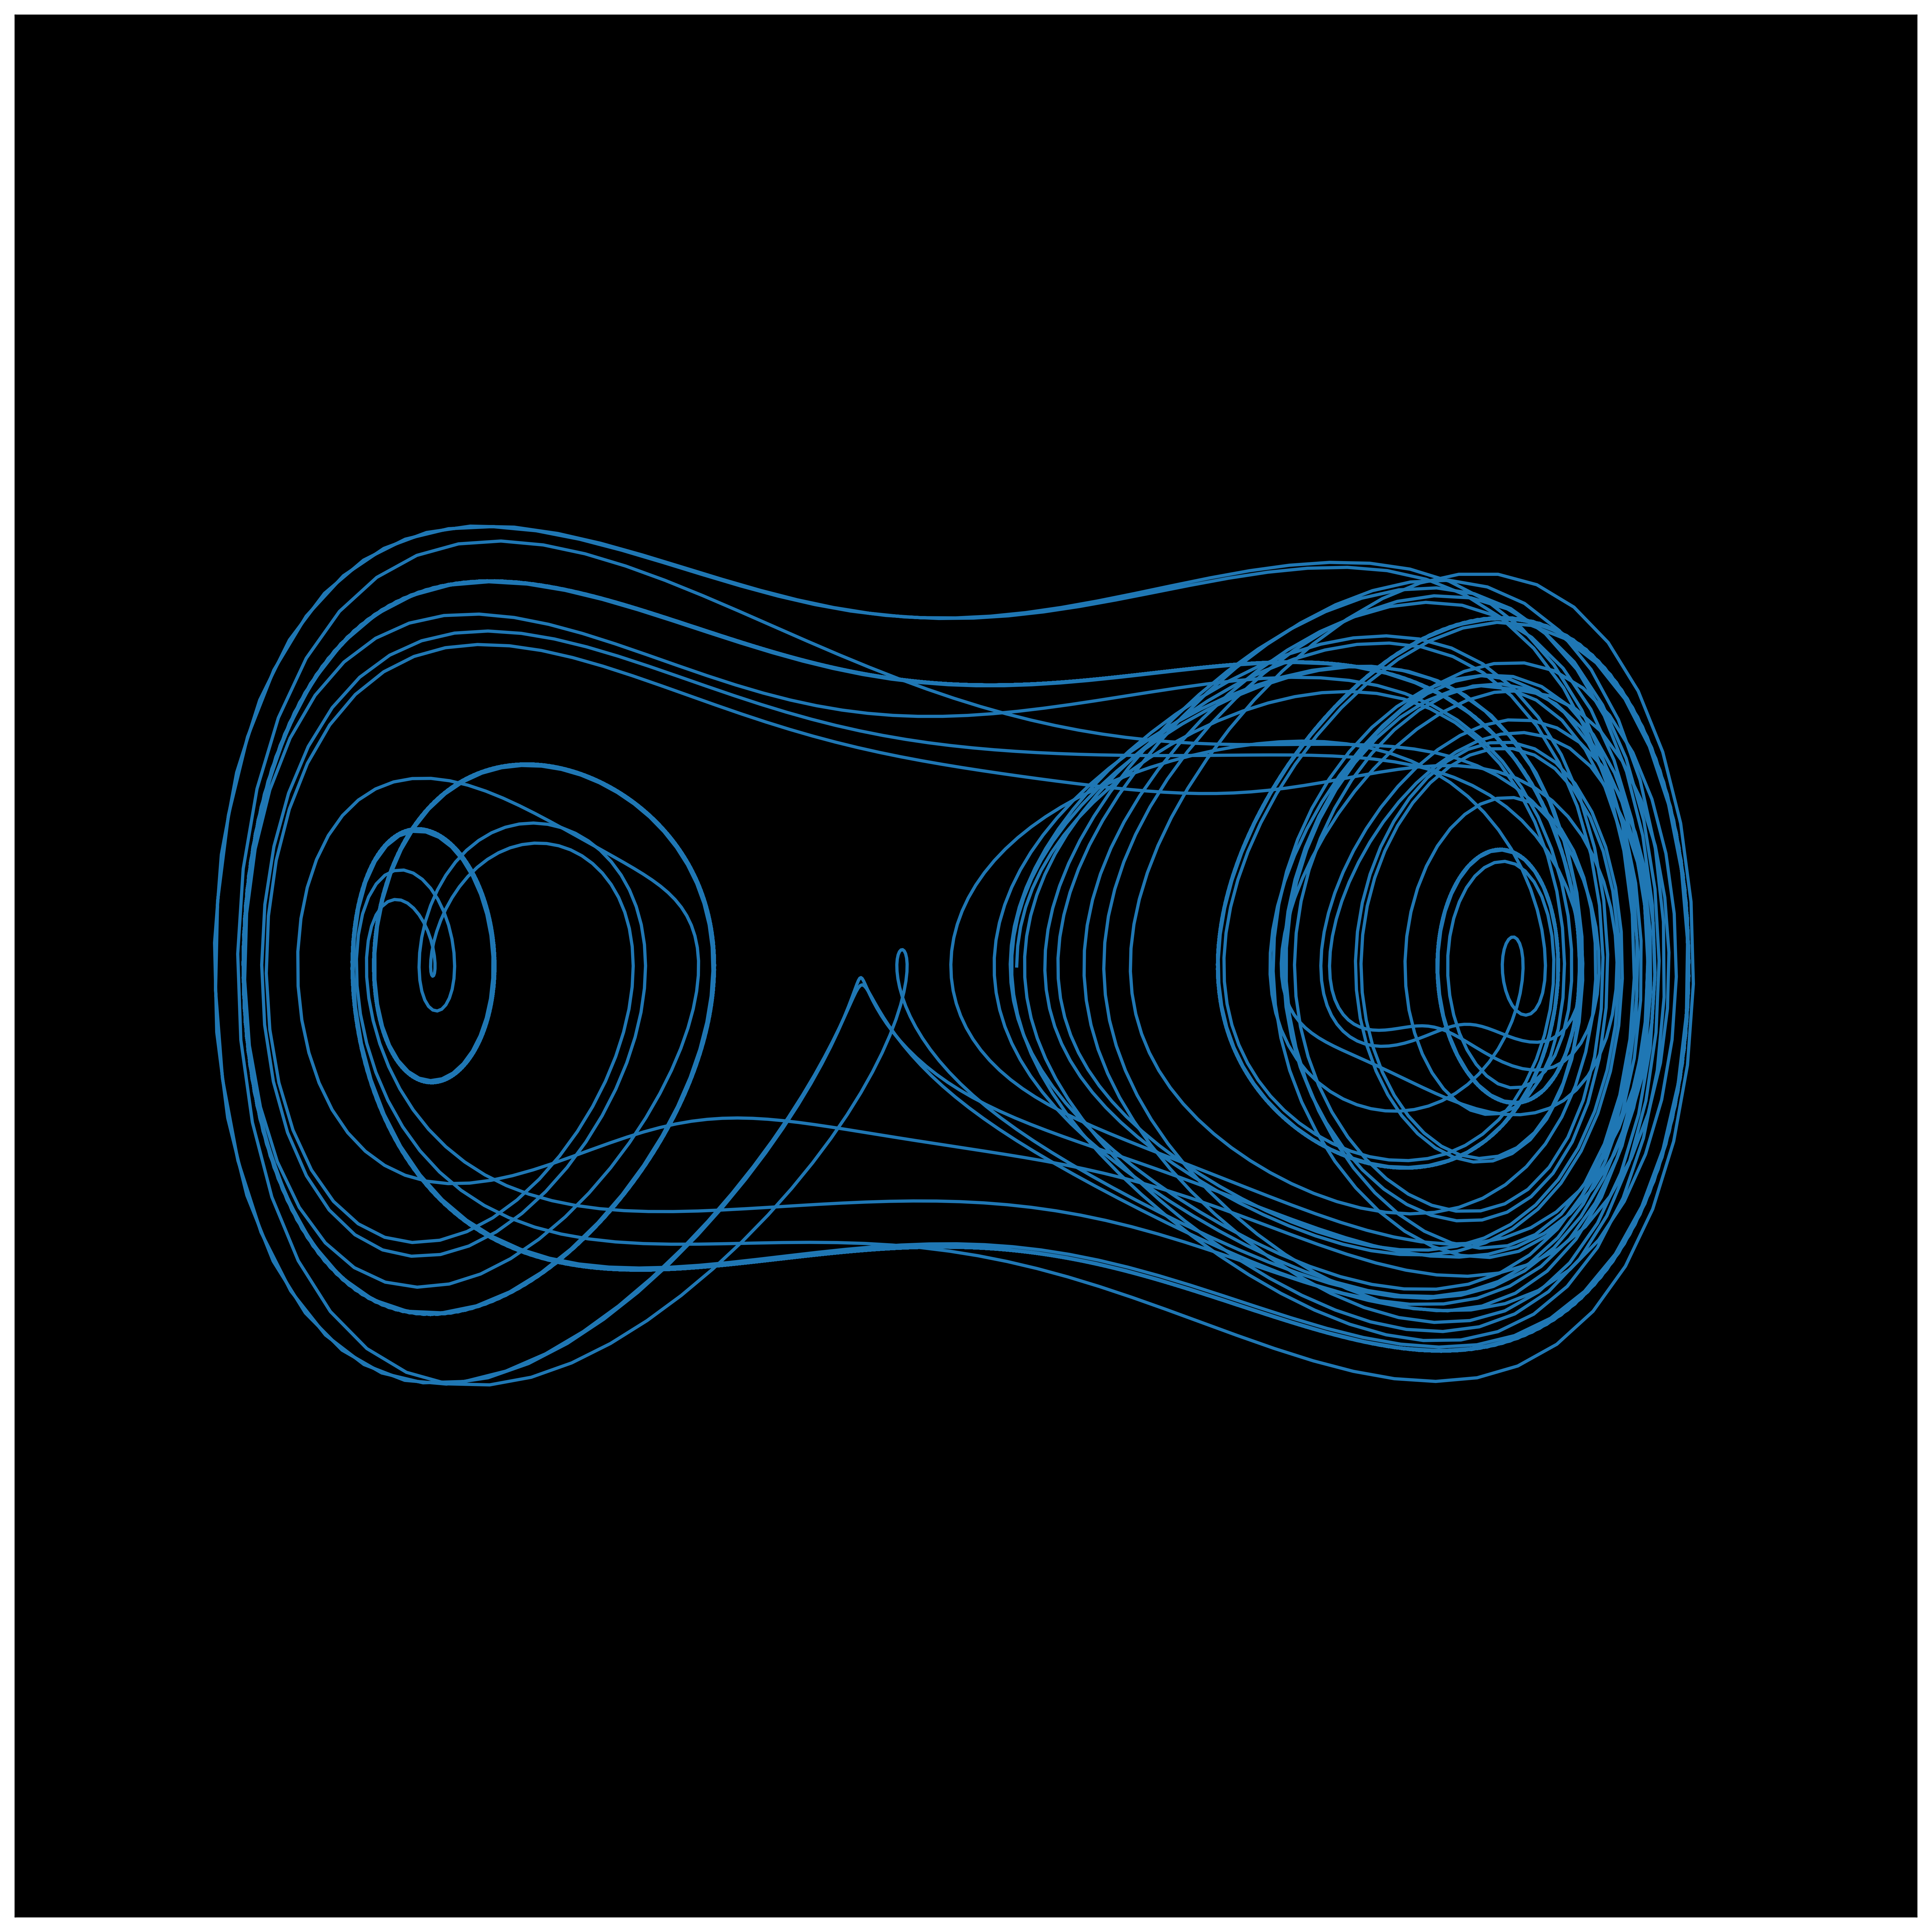

In [13]:
# imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function
def myODE2(Y, t):
    delta, alpha, beta, gamma, omega = 0.2, -1, 1, 0.3, 1.2
    x2_prime = - delta * Y[1] - alpha * Y[0] - beta * (Y[0] ** 3) + gamma * np.cos(omega * t)
    x1_prime = Y[1]

    return [x1_prime, x2_prime]

# variables
time_val = np.arange(0, 1000, 0.1)
t0, tf = 0.0, 400.0
scale_factor = 8
pos, vel = scale_factor * odeint(myODE2, [0.1, 0.0], time_val).T 

# plotting
plt.rcParams["figure.figsize"] = 24,16
fig, ax = plt.subplots(dpi=500)
ax.axis([-15,15,-15,15])
ax.set_aspect("equal")
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.tick_params(axis='y', left=False, labelleft=False)
plt.plot(pos, vel)
plt.show()

Alternatively, the system can be treated as position, $x$, and velocity, $v$, to define the first order differential equations respectively. 

$\dot{x} = y$, and $\dot{y} = \ddot{x}$

In [2]:
def Duffing_ODE(t, y):
    x, v = y
    dxdt = v
    dvdt = - delta * v - alpha * x - beta * (x ** 3) + gamma * np.cos(omega * t)
    return [dxdt, dvdt]